# Data Cleaning With Pandas

In [1]:
import requests 

def downloadDataSet(url,destNameFile): 
    """
    Download Data Set
    """
    response = requests.get(url)
    if response.status_code == 200: 
        with open(destNameFile, 'wb') as f:
            f.write(response.content)
        
        response.close()
        return True 
    
    response.close()
    print("Request Error , http statuscode : ",response.status_code)
    return False 

In [2]:
url = "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv"

In [3]:
namaFile = "property_data.csv"
status = downloadDataSet(url,namaFile)
print(status)

True


In [4]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv(namaFile)

In [6]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


* ST_NUM: Street number
* ST_NAME: Street name
* OWN_OCCUPIED: Pemiliknya menempati ? 
* NUM_BEDROOMS: Number of bedrooms
* NUM_BATH : number bathrooms 

SQ_FT : square foot 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


## Standard Missing Values

In [8]:
dfa = pd.DataFrame([[2,3,1], [3,2,2], [2,4,4]], columns=list("ABC"))
dfa

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [9]:
dfa.apply?

In [10]:
dfa.apply(lambda x : x['A'], axis =1)

0    2
1    3
2    2
dtype: int64

In [11]:
dfa.apply(lambda x : x['A'], axis =0) # Error KeyError: 'A'

KeyError: 'A'

In [ ]:
dfa.apply(lambda x : x, axis =1)

In [12]:
dfa.iloc[0:1,] #  0:1 , 1 not include   row , get all kolumn,  .shape 1,3  #ndim  2 dim 

,A,B,C
0,2,3,1


In [13]:
#Access a group of rows and columns by label(s) or a boolean array 
dfa.loc[0] # default axis = 0 .ndim  1 dim ,   shape 3,1 

A    2
B    3
C    1
Name: 0, dtype: int64

In [14]:
dfa.loc[0:1]

,A,B,C
0,2,3,1
1,3,2,2


In [15]:
# kita ingin memberikan warna merah pada data frame variabel dfa 
# jika data tersebut harus lebih besar dari baris 0  [2,3,1] 
# try change axis 
# 2 >  [2,3,1]
# 3 > [2,3,1]
# 1 > 
# axis = 0 kolom 
# axis = 1 baris 
dfa.style.apply(lambda x: ["background: red" if v >= x.iloc[0] else "" for v in x], axis = 0)

,A,B,C
0,2,3,1
1,3,2,2
2,2,4,4


In [16]:
dfx = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
dfx

,A,B
0,4,9
1,4,9
2,4,9


In [17]:
dfx.apply(np.sqrt)

,A,B
0,2.0,3.0
1,2.0,3.0
2,2.0,3.0


In [18]:
dfx.apply(np.sum, axis=0)   # apply utk tiap kolom 

A    12
B    27
dtype: int64

In [19]:
dfx.apply(np.sum, axis=1)  # apply utk tiap baris 

0    13
1    13
2    13
dtype: int64

In [20]:
# Returning a list-like will result in a Series [1.2]
dfx.apply(lambda x: [1, 2], axis=1)

0    [1, 2]
1    [1, 2]
2    [1, 2]
dtype: object

In [21]:
dfx.apply(lambda x: [1, 2], axis=0)

,A,B
0,1,1
1,2,2


In [22]:
#Passing ``result_type='expand'`` will expand list-like results to columns of a Dataframe
dfx.apply(lambda x: [1, 2], axis=1, result_type='expand')

,0,1
0,1,2
1,1,2
2,1,2


In [23]:
dfx.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)

,foo,bar
0,1,2
1,1,2
2,1,2


Kembali ke dataset sebelumnya, lihat "Street Number"

In [24]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [25]:
street_num = df.loc[:,['ST_NUM']]
street_num

,ST_NUM
0,104.0
1,197.0
2,NaN
3,201.0
4,203.0
5,207.0
6,NaN
7,213.0
8,215.0


In [26]:
import math 
def highlight_column_nan(column):    
    """
    Function untuk me return background-color
    """
    highlight = 'background-color: palegreen;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if math.isnan(v)  else default for v in column]
    
#df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)

In [27]:
# untuk menampilkan beberapa kolom
street_num = df.loc[:,['ST_NUM','ST_NAME','NUM_BEDROOMS','OWN_OCCUPIED']]
street_num

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.0,PUTNAM,3,Y
1,197.0,LEXINGTON,3,N
2,NaN,LEXINGTON,NaN,N
3,201.0,BERKELEY,1,12
4,203.0,BERKELEY,3,Y
5,207.0,BERKELEY,NaN,Y
6,NaN,WASHINGTON,2,NaN
7,213.0,TREMONT,--,Y
8,215.0,TREMONT,na,Y


df.apply?

* 0 or 'index': apply function to each column.
* 1 or 'columns': apply function to each row.

agak berbeda dengan dataframe axis = 0 baris , axis = 1 kolom

In [28]:
# melakukan apply function highlight_column_nan
street_num.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [29]:
# menampilkan st_num 
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [30]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [31]:
# melakukan pengecekan is null / isna 
df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

## Non-Standard Missing Values

In [32]:
import math 

missing_values = ["n/a", "na", "--"]

#str(1e400*0) == NaN
def highlight_column_missing_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [highlight if str(v) == str(1e400*0) or v in missing_values else default for v in column]
    
#df.style.apply(highlight_column_nan, subset=['ST_NUM'], axis=0)

In [33]:
street_num.style.apply(highlight_column_missing_values, subset=['NUM_BEDROOMS'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


Di kolom ini, ada empat missing values.

* n/a
* NA
* —
* na

In [34]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [35]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

Pada index ke 7 & 8 is null tdk true dengan kata lain tdk di identifikasikan sebaga NA

In [36]:
df = pd.read_csv(namaFile, na_values = missing_values) # didifinisikan kategory sebaga NA

In [37]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [38]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

Kali ini, semua format berbeda dikenali sebagai missing values.

## Unexpected Missing Values

Lihat kolom "Owner Occupied"

In [39]:
values_real = ["Y", "N", "y","n"]

def highlight_column_creteria_values(column):    
    highlight = 'background-color: yellow;'
    default = '' 
    #return [highlight if str(v) == str(1e400*0)  else default for v in column]
    return [default if v in values_real else highlight for v in column]

In [40]:
street_num.style.apply(highlight_column_creteria_values, subset=['OWN_OCCUPIED'], axis=0)

,ST_NUM,ST_NAME,NUM_BEDROOMS,OWN_OCCUPIED
0,104.000000,PUTNAM,3,Y
1,197.000000,LEXINGTON,3,N
2,nan,LEXINGTON,nan,N
3,201.000000,BERKELEY,1,12
4,203.000000,BERKELEY,3,Y
5,207.000000,BERKELEY,nan,Y
6,nan,WASHINGTON,2,nan
7,213.000000,TREMONT,--,Y
8,215.000000,TREMONT,na,Y


In [41]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [42]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris keempat, ada angka 12. Respons untuk Owner Occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Ada sejumlah pendekatan berbeda, ini salah satu cara mengatasinya.
* Loop pada kolom OWN_OCCUPIED
* Kita coba ubah semua entry menjadi integer
* Jika entry tidak dapat diubah menjadi integer, tandai sebagai missing value
* Jika tidak dapat menjadi integer, maka kita tau kalau entry adalah string, keep going

In [43]:
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [44]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Summarizing Missing Values

In [45]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [46]:
# apakah kita memiliki nilai yang hilang sama sekali.
df.isnull().values.any()

True

In [47]:
df.isnull().sum().sum() #jumlah total missing values.

12

## Replacing Missing Values

In [48]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [49]:
# Mengisi missing values dengan single value
df['ST_NUM'].fillna(125, inplace=True)

In [50]:
df.loc[2,'ST_NUM'] = 125

In [51]:
# Mengisi missing values dengan median
median = df['NUM_BEDROOMS'].median()
median

3.0

In [52]:
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [53]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Latihan Number of Unique

In [54]:
import pandas as pd
  
# Creating the first dataframe 
df = pd.DataFrame({"A":[14, 4, 5, 4, 1],
                   "B":[5, 2, 54, 3, 2],
                   "C":[20, 20, 7, 3, 8],
                    "D":[14, 3, 6, 2, 6]})
  
# Print the dataframe
df

,A,B,C,D
0,14,5,20,14
1,4,2,20,3
2,5,54,7,6
3,4,3,3,2
4,1,2,8,6


In [55]:
df.nunique(axis=1) 

0    3
1    4
2    4
3    3
4    4
dtype: int64

In [56]:
df.nunique(axis=0) 

A    4
B    4
C    4
D    4
dtype: int64

In [57]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df

,A,B
0,1,1
1,2,1
2,3,1


In [58]:
df.nunique()

A    3
B    1
dtype: int64

# Data Cleaning Dataset Tumpahan Oli

https://github.com/jbrownlee/Datasets/blob/master/oil-spill.csv

### Identifikasi Kolom yang Mengandung Nilai Tunggal

Kolom yang memiliki satu pengamatan atau nilai mungkin tidak berguna untuk pemodelan.

Kolom atau prediktor ini disebut prediktor varian nol seolah-olah kita mengukur varians (nilai rata-rata dari mean), itu akan menjadi nol.

In [59]:
# summarize the number of unique values for each column using numpy
from numpy import loadtxt
from numpy import unique

# load the dataset
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 

print(type(data))

for i in range(data.shape[1]):
    print(i, len(unique(data[:, i])))

<class 'numpy.ndarray'>
0 238
1 297
2 927
3 933
4 179
5 375
6 820
7 618
8 561
9 57
10 577
11 59
12 73
13 107
14 53
15 91
16 893
17 810
18 170
19 53
20 68
21 9
22 1
23 92
24 9
25 8
26 9
27 308
28 447
29 392
30 107
31 42
32 4
33 45
34 141
35 110
36 3
37 758
38 9
39 9
40 388
41 220
42 644
43 649
44 499
45 2
46 937
47 169
48 286
49 2


In [60]:
from pandas import read_csv

# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)

# summarize the number of unique values in each column 
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


pada index 22 hanya 1 jumlah yg unik dengan kata lain nilai nya sama semua

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [62]:
# get number of unique values for each column 
jmlunik = df.nunique()
print(jmlunik)

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


In [63]:
# record columns to delete

to_del = [i for i,v in enumerate(jmlunik) if v == 1]
print(to_del)

[22]


### Delete Columns That Contain a Single Value

In [64]:
from pandas import read_csv

# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
print(df.shape)

(937, 50)


In [65]:
# get number of unique values for each column 
counts = df.nunique()

In [66]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)

[22]


In [67]:
# drop useless columns 
df.drop(to_del, axis=1, inplace=True) 
print(df.shape)

(937, 49)


### Pertimbangkan Kolom yang Memiliki Nilai Sangat Sedikit

In [68]:
# summarize the percentage of unique values for each column using numpy
from pandas import read_csv
from numpy import loadtxt
from numpy import unique
# load the dataset
data = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', delimiter=',')
# summarize the number of unique values in each column 
# data.shape --> (937,50)
# print(data.shape[0]) # get baris 
# print(data.shape[1]) # get kolom 
for i in range(data.shape[1]): # get kolom 
    num = len(unique(data[:, i]))
    percentage = float(num) / data.shape[0] * 100 
    if percentage < 1:
        print('Kurang dari 1 : %d, %d, %.1f%%' % (i, num, percentage))
    else:
        print('%d, %d, %.1f%%' % (i, num, percentage)) 

0, 238, 25.4%
1, 297, 31.7%
2, 927, 98.9%
3, 933, 99.6%
4, 179, 19.1%
5, 375, 40.0%
6, 820, 87.5%
7, 618, 66.0%
8, 561, 59.9%
9, 57, 6.1%
10, 577, 61.6%
11, 59, 6.3%
12, 73, 7.8%
13, 107, 11.4%
14, 53, 5.7%
15, 91, 9.7%
16, 893, 95.3%
17, 810, 86.4%
18, 170, 18.1%
19, 53, 5.7%
20, 68, 7.3%
Kurang dari 1 : 21, 9, 1.0%
Kurang dari 1 : 22, 1, 0.1%
23, 92, 9.8%
Kurang dari 1 : 24, 9, 1.0%
Kurang dari 1 : 25, 8, 0.9%
Kurang dari 1 : 26, 9, 1.0%
27, 308, 32.9%
28, 447, 47.7%
29, 392, 41.8%
30, 107, 11.4%
31, 42, 4.5%
Kurang dari 1 : 32, 4, 0.4%
33, 45, 4.8%
34, 141, 15.0%
35, 110, 11.7%
Kurang dari 1 : 36, 3, 0.3%
37, 758, 80.9%
Kurang dari 1 : 38, 9, 1.0%
Kurang dari 1 : 39, 9, 1.0%
40, 388, 41.4%
41, 220, 23.5%
42, 644, 68.7%
43, 649, 69.3%
44, 499, 53.3%
Kurang dari 1 : 45, 2, 0.2%
46, 937, 100.0%
47, 169, 18.0%
48, 286, 30.5%
Kurang dari 1 : 49, 2, 0.2%


In [69]:
for i,v in enumerate(counts):
    if (float(v)/df.shape[0]*100) < 1:
        print(' : %d, %d, %.1f%%' % (i, v, float(v)/df.shape[0]*100))

 : 21, 9, 1.0%
 : 22, 1, 0.1%
 : 24, 9, 1.0%
 : 25, 8, 0.9%
 : 26, 9, 1.0%
 : 32, 4, 0.4%
 : 36, 3, 0.3%
 : 38, 9, 1.0%
 : 39, 9, 1.0%
 : 45, 2, 0.2%
 : 49, 2, 0.2%


In [70]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1] 
print(to_del)

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]


In [71]:
data=read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv', header=None)
data.shape

(937, 50)

In [72]:
data.drop(to_del, axis=1, inplace=True) 
print(data.shape)

(937, 39)


## Identify Rows That Contain Duplicate Data

In [73]:
# locate rows of duplicate data
from pandas import read_csv

# load the dataset
df = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None) # calculate duplicates
dups = df.duplicated()
dups

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [74]:
# report if there are any duplicates 
print(dups.any())

True


In [75]:
# list all duplicate rows 
print(df[dups])
print(df.shape)

       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica
(150, 5)


In [76]:
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)

(147, 5)


# Dataset Diabetes

In [77]:
# load and summarize the dataset
from pandas import read_csv

# load the dataset
dataset = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None) # summarize the dataset
dataset.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
dataset.shape

(768, 9)

## Tandai Nilai yang Hilang

In [79]:
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

Dapat dilihat bahwa ada kolom yang memiliki nilai minimal nol (0). Pada beberapa kolom, nilai nol tidak masuk akal dan menunjukkan nilai yang tidak valid atau hilang.

Specifically, the following columns have an invalid zero minimum value:
* 1: Plasma glucose concentration 
* 2: Diastolic blood pressure
* 3: Triceps skinfold thickness
* 4: 2-Hour serum insulin
* 5: Body mass index

In [80]:
print(dataset.head(20))
# kita lihat 0 values pada columns 2, 3, 4, and 5.

     0    1   2   3    4     5      6   7  8
0    6  148  72  35    0  33.6  0.627  50  1
1    1   85  66  29    0  26.6  0.351  31  0
2    8  183  64   0    0  23.3  0.672  32  1
3    1   89  66  23   94  28.1  0.167  21  0
4    0  137  40  35  168  43.1  2.288  33  1
5    5  116  74   0    0  25.6  0.201  30  0
6    3   78  50  32   88  31.0  0.248  26  1
7   10  115   0   0    0  35.3  0.134  29  0
8    2  197  70  45  543  30.5  0.158  53  1
9    8  125  96   0    0   0.0  0.232  54  1
10   4  110  92   0    0  37.6  0.191  30  0
11  10  168  74   0    0  38.0  0.537  34  1
12  10  139  80   0    0  27.1  1.441  57  0
13   1  189  60  23  846  30.1  0.398  59  1
14   5  166  72  19  175  25.8  0.587  51  1
15   7  100   0   0    0  30.0  0.484  32  1
16   0  118  84  47  230  45.8  0.551  31  1
17   7  107  74   0    0  29.6  0.254  31  1
18   1  103  30  38   83  43.3  0.183  33  0
19   1  115  70  30   96  34.6  0.529  32  1


In [81]:
num_missing = (dataset[[1,2,3,4,5]] == 0).sum()
# report the results
print(num_missing)

1      5
2     35
3    227
4    374
5     11
dtype: int64


In [82]:
from numpy import nan

# replace '0' values with 'nan'
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)

In [83]:
# summarize the first 20 rows of data 
print(dataset.head(20))

     0      1     2     3      4     5      6   7  8
0    6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1    1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2    8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3    1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4    0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
5    5  116.0  74.0   NaN    NaN  25.6  0.201  30  0
6    3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
7   10  115.0   NaN   NaN    NaN  35.3  0.134  29  0
8    2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
9    8  125.0  96.0   NaN    NaN   NaN  0.232  54  1
10   4  110.0  92.0   NaN    NaN  37.6  0.191  30  0
11  10  168.0  74.0   NaN    NaN  38.0  0.537  34  1
12  10  139.0  80.0   NaN    NaN  27.1  1.441  57  0
13   1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
14   5  166.0  72.0  19.0  175.0  25.8  0.587  51  1
15   7  100.0   NaN   NaN    NaN  30.0  0.484  32  1
16   0  118.0  84.0  47.0  230.0  45.8  0.551  31  1
17   7  107.0  74.0   NaN    NaN  29.6  0.254 

In [84]:
# count the number of nan values in each column 
print(dataset.isnull().sum())

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64


# Time Series

## Basic Time Series Manipulation

In [85]:
from datetime import datetime

In [86]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [87]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [88]:
df = pd.DataFrame(date_rng, columns=['date'])

In [89]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [90]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [91]:
df.head()

,date,data
0,2020-01-01 00:00:00,30
1,2020-01-01 01:00:00,25
2,2020-01-01 02:00:00,83
3,2020-01-01 03:00:00,85
4,2020-01-01 04:00:00,2


Konversikan indeks data frame menjadi datetime index dan tampilkan elemen pertama:

In [92]:
df['datetime'] = pd.to_datetime(df['date'])

In [93]:
df

,date,data,datetime
0,2020-01-01 00:00:00,30,2020-01-01 00:00:00
1,2020-01-01 01:00:00,25,2020-01-01 01:00:00
2,2020-01-01 02:00:00,83,2020-01-01 02:00:00
3,2020-01-01 03:00:00,85,2020-01-01 03:00:00
4,2020-01-01 04:00:00,2,2020-01-01 04:00:00
...,...,...,...
164,2020-01-07 20:00:00,38,2020-01-07 20:00:00
165,2020-01-07 21:00:00,45,2020-01-07 21:00:00
166,2020-01-07 22:00:00,41,2020-01-07 22:00:00
167,2020-01-07 23:00:00,40,2020-01-07 23:00:00


In [94]:
df = df.set_index('datetime')
df 

,date,data
datetime,,
2020-01-01 00:00:00,2020-01-01 00:00:00,30
2020-01-01 01:00:00,2020-01-01 01:00:00,25
2020-01-01 02:00:00,2020-01-01 02:00:00,83
2020-01-01 03:00:00,2020-01-01 03:00:00,85
2020-01-01 04:00:00,2020-01-01 04:00:00,2
...,...,...
2020-01-07 20:00:00,2020-01-07 20:00:00,38
2020-01-07 21:00:00,2020-01-07 21:00:00,45
2020-01-07 22:00:00,2020-01-07 22:00:00,41


In [95]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=169, freq=None)

In [96]:
df.drop(['date'], axis=1, inplace=True)

In [97]:
df.head()

,data
datetime,
2020-01-01 00:00:00,30
2020-01-01 01:00:00,25
2020-01-01 02:00:00,83
2020-01-01 03:00:00,85
2020-01-01 04:00:00,2


In [98]:
string_date_rng = [str(x) for x in date_rng]

In [99]:
string_date_rng

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [100]:
#Konversi string menjadi timestamps
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

infer_datetime_format : boolean, default Salah

Jika True dan parse_dates diaktifkan, panda akan mencoba menyimpulkan format string datetime di kolom, dan jika dapat disimpulkan, beralih ke metode parsing yang lebih cepat. Dalam beberapa kasus, ini dapat meningkatkan kecepatan penguraian sebesar 5-10x.

In [101]:
from dateutil import parser
from datetime import datetime

L = ['2018-01-05', '2018-12-20', '2018-03-30', '2018-04-15']*5000

%timeit [parser.parse(i) for i in L]                   # 1.57 s
%timeit [datetime.strptime(i, '%Y-%m-%d') for i in L]  # 338 ms

835 ms ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
195 ms ± 15.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [102]:
timestamp_date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [103]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [104]:
timestamp_date_rng_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2]

In [105]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [106]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [107]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [108]:
# kembali ke data frame asli
# ingin melihat data dimana tanggalnya adalah tanggal 2 setiap bulannya

df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,52
2020-01-02 01:00:00,68
2020-01-02 02:00:00,11
2020-01-02 03:00:00,90
2020-01-02 04:00:00,97
2020-01-02 05:00:00,86
2020-01-02 06:00:00,14
2020-01-02 07:00:00,43
2020-01-02 08:00:00,22


In [109]:
# bisa juga langsung memanggil tanggal yang ingin kita lihat melalui index

df['2020-01-03']
#df.loc['2020-01-03']

<ipython-input-109-c4eed6fe3644>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,45
2020-01-03 01:00:00,88
2020-01-03 02:00:00,52
2020-01-03 03:00:00,57
2020-01-03 04:00:00,15
2020-01-03 05:00:00,12
2020-01-03 06:00:00,62
2020-01-03 07:00:00,20
2020-01-03 08:00:00,47


In [110]:
# memilih data di antara tanggal tertentu

df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,31
2020-01-04 01:00:00,17
2020-01-04 02:00:00,65
2020-01-04 03:00:00,68
2020-01-04 04:00:00,76
...,...
2020-01-06 19:00:00,1
2020-01-06 20:00:00,64
2020-01-06 21:00:00,21


### Resample

Mengambil ulang sampel/resample data pada frekuensi yang berbeda dan menentukan bagaimana kita ingin menghitung summary statistic untuk frekuensi sampel baru.

Kami dapat mengambil min, max, average, sum, dll., Dari data pada frekuensi harian daripada frekuensi per jam, contoh :

In [111]:
df.resample?

In [112]:
# Day       = D
# 3 minute = 3T 
# 30 second = 30S
df.resample('D').mean()

,data
datetime,
2020-01-01,54.416667
2020-01-02,48.083333
2020-01-03,54.333333
2020-01-04,51.208333
2020-01-05,42.583333
2020-01-06,37.041667
2020-01-07,45.708333
2020-01-08,0.000000


### Window Statistics
* Rolling mean 
* Rolling sum

In [113]:
df['rolling_sum'] = df.rolling(3).sum()

In [114]:
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,30,NaN
2020-01-01 01:00:00,25,NaN
2020-01-01 02:00:00,83,138.0
2020-01-01 03:00:00,85,193.0
2020-01-01 04:00:00,2,170.0


pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada tiga periode untuk melihat ke belakang.

Berikut df kita, tetapi dengan kolom baru yang mengambil rolling sum dan backfills data:

In [115]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')

In [116]:
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,30,NaN,138.0
2020-01-01 01:00:00,25,NaN,138.0
2020-01-01 02:00:00,83,138.0,138.0
2020-01-01 03:00:00,85,193.0,193.0
2020-01-01 04:00:00,2,170.0,170.0


## Time Series on Dataset

In [117]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

DataFrame memiliki 4383 baris, mencakup periode dari 1 Januari 2006 hingga 31 Desember 2017.

In [118]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [119]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [120]:
# merubah  kolom Date  set sebagai indeks DataFrame.

opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [121]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

kita dapat menggabungkan langkah-langkah di atas menjadi satu baris, menggunakan parameter index_col dan parse_dates dari fungsi read_csv()

In [122]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', 
                index_col=0, parse_dates=True)

In [123]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


tambahkan beberapa kolom lagi ke opsd_daily, yang berisi tahun, bulan, dan hari kerja.

In [124]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [125]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [126]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [127]:
# memilih slice dari hari, seperti '2014-01-20': '2014-01-22'

opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


partial-string indexing, memilih semua tanggal / waktu yang sebagian cocok dengan string yang diberikan. Misalnya, kita dapat memilih seluruh tahun 2006 dengan opsd_daily.loc['2006'], atau seluruh bulan Februari 2012 dengan opsd_daily.loc['2012-02'].

In [128]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


## Visualisasi Data Time Series

Line plot dari time series konsumsi listrik harian di Jerman, menggunakan method plot() DataFrame

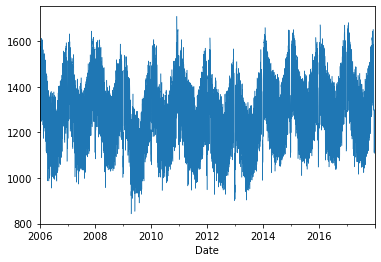

In [129]:
opsd_daily['Consumption'].plot(linewidth=0.5);

method plot() memilih lokasi tick yang cukup bagus (setiap dua tahun) dan label (years) untuk sumbu x, yang sangat membantu. Namun, dengan banyaknya titik data, line plot menjadi padat dan sulit untuk dibaca.

Mari kita plot data sebagai titik-titik, dan lihat juga time series dari Matahari dan Angin.

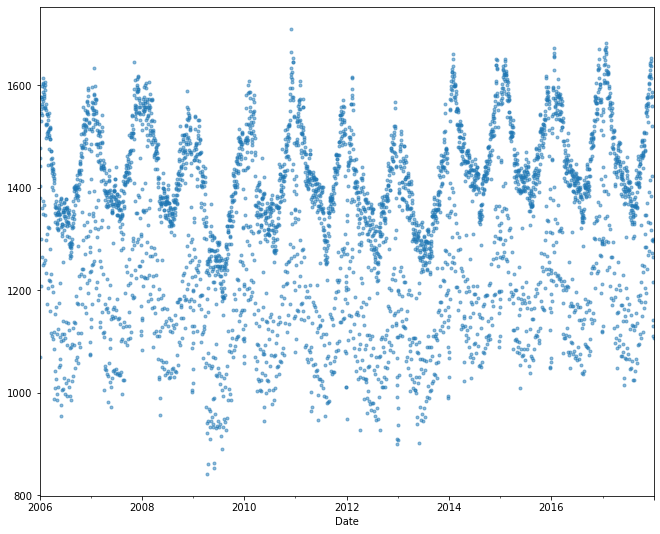

In [130]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

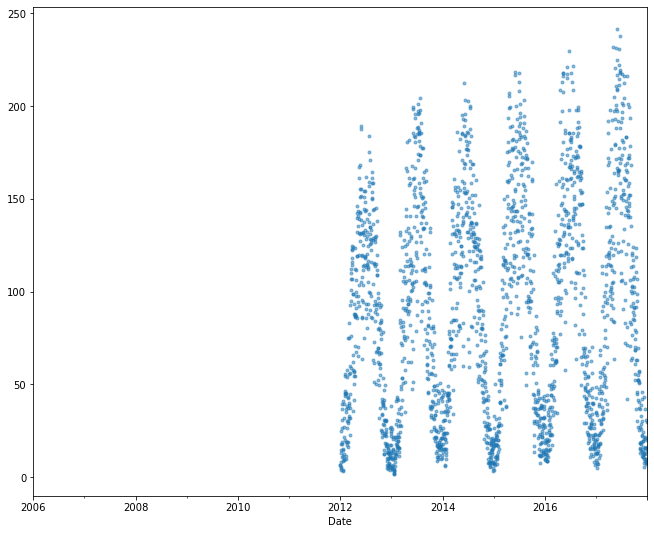

In [131]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

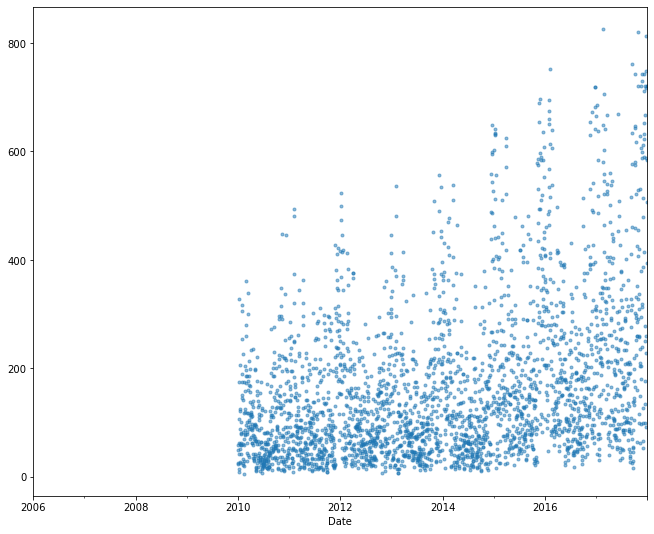

In [132]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

Konsumsi listrik tertinggi ada di musim dingin, kemungkinan karena pemanas listrik dan peningkatan penggunaan penerangan, dan terendah di musim panas.

Produksi tenaga surya paling tinggi di musim panas, saat sinar matahari paling melimpah, dan paling rendah di musim dingin.

Produksi tenaga angin paling tinggi di musim dingin, mungkin karena angin yang lebih kuat dan badai yang lebih sering, dan paling rendah di musim panas.

Tampaknya ada tren peningkatan yang kuat dalam produksi tenaga angin selama bertahun-tahun.

Ketiga time series dengan jelas menunjukkan periodisitas — sering disebut sebagai seasonality dalam time series analysis — di mana sebuah pola berulang berulang kali pada interval waktu yang teratur. 

Rangkaian waktu Consumption, Solar, dan Wind berosilasi antara nilai tinggi dan rendah dalam skala waktu tahunan, sesuai dengan perubahan cuaca musiman sepanjang tahun. 

Namun, musim secara umum tidak harus sesuai dengan musim meteorologi. Misalnya, data penjualan ritel sering kali menunjukkan musim tahunan dengan peningkatan penjualan pada bulan November dan Desember, menjelang liburan.

Seasonality juga dapat terjadi pada skala waktu lain. Plot di atas menunjukkan bahwa konsumsi listrik Jerman mungkin terlihat weekly seasonality, sesuai dengan hari kerja dan akhir pekan. 

**plot deret waktu dalam satu tahun untuk menyelidiki lebih lanjut.**

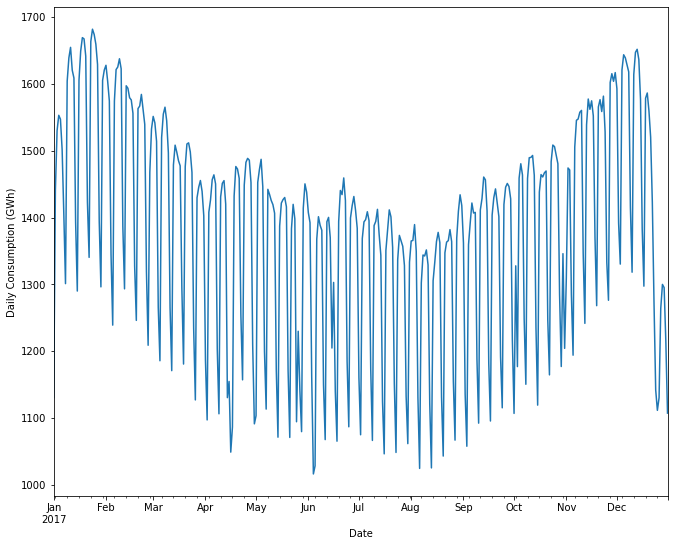

In [133]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Sekarang kita dapat dengan jelas melihat osilasi mingguan/weekly oscillations. Ciri menarik lain yang terlihat pada tingkat granularitas ini adalah penurunan drastis konsumsi listrik pada awal Januari dan akhir Desember, selama liburan.

kita perbesar lebih jauh dan lihat bulan Januari dan Februari saja.

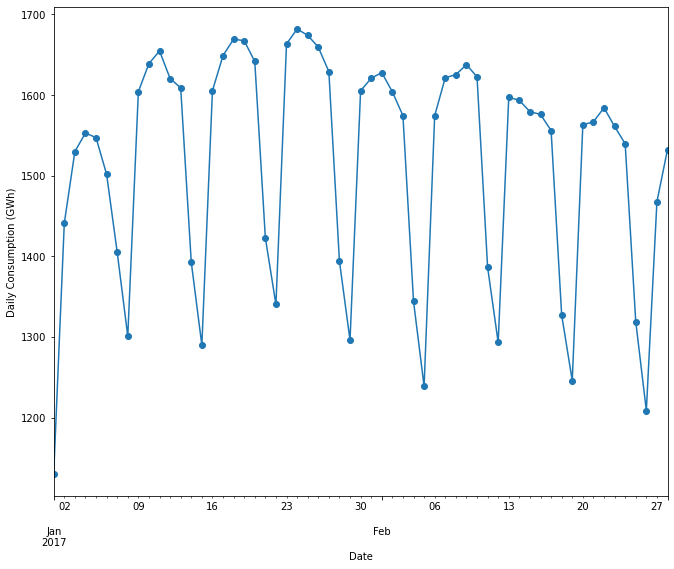

In [134]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

Selanjutnya, mari kita jelajahi lebih jauh seasonality data kita dengan fungsi box plots untuk mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok. Pertama-tama, kita akan mengelompokkan data berdasarkan bulan, untuk memvisualisasikan yearly seasonality.

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

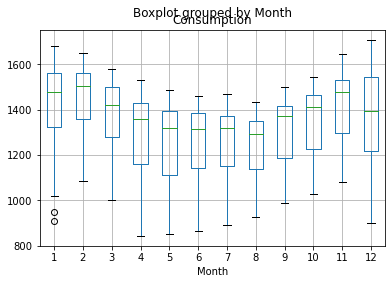

In [135]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

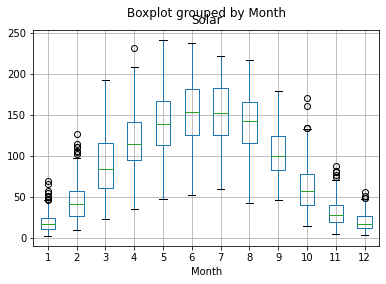

In [136]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

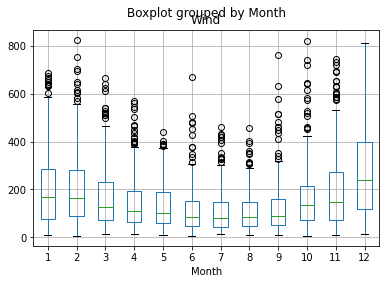

In [137]:
opsd_daily.boxplot(column=['Wind'], by='Month')

box plots berikut mengonfirmasi yearly seasonality yang kitalihat di plot sebelumnya dan memberikan beberapa insights:

Meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah di musim panas, 

median dan dua kuartil lebih rendah pada bulan Desember dan Januari dibandingkan dengan November dan Februari, kemungkinan karena bisnis tutup selama liburan. 

Kita melihat ini dalam rangkaian waktu untuk tahun 2017, dan box plot menegaskan bahwa ini adalah pola yang konsisten selama bertahun-tahun.

Sementara produksi tenaga surya dan angin sama-sama menunjukkan yearly seasonality, distribusi tenaga angin memiliki lebih banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca sementara lainnya.

Selanjutnya, mari kelompokkan rangkaian waktu konsumsi listrik berdasarkan hari dalam seminggu, untuk menjelajahi weekly seasonality.

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

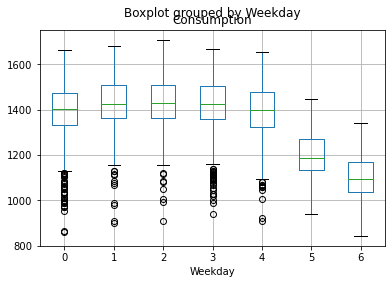

In [138]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

Seperti yang diharapkan, konsumsi listrik secara signifikan lebih tinggi pada hari kerja dibandingkan pada akhir pekan. Outliers rendah pada hari kerja mungkin selama hari libur/holidays.

Seringkali berguna untuk resample data time series kita ke frekuensi yang lebih rendah atau lebih tinggi. 
- Resampling ke frekuensi yang lebih rendah (downsampling) biasanya melibatkan operasi agregasi - misalnya, menghitung total penjualan bulanan dari data harian. 
- Resampling ke frekuensi yang lebih tinggi (upsampling) kurang umum dan sering kali melibatkan interpolasi atau metode pengisian data lainnya - misalnya, menginterpolasi data cuaca setiap jam hingga interval 10 menit untuk dimasukkan ke model ilmiah.


Kita akan fokus di sini pada downsampling, mengeksplorasi bagaimana hal itu dapat membantu kita menganalisis data OPSD dalam berbagai skala waktu. 

Kita menggunakan method resample() DataFrame, yang membagi DatetimeIndex ke dalam time bins dan mengelompokkan data menurut time bin. 

Metode resample() mengembalikan objek Resampler, mirip dengan objek GroupBy pandas. 

Kita kemudian dapat menerapkan metode agregasi seperti  mean(), median(), sum(), dll., Ke grup data untuk setiap time bin.

Misalnya, mari kita resample data menjadi weekly mean time series.

In [139]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


Baris pertama di atas, berlabel 2006-01-01, berisi rata-rata dari semua data yang ada dalam time bin 2006-01-01 hingga 2006-01-07. Baris kedua, berlabel 2006-01-08, berisi data rata-rata untuk time bin 2006-01-08 hingga 2006-01-14, dan seterusnya.

Berdasarkan konstruksi, deret waktu mingguan kita memiliki 1/7 poin data sebanyak deret waktu harian. Kita dapat mengonfirmasi ini dengan membandingkan jumlah baris dari dua DataFrame.

In [140]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


Mari kita gambarkan rangkaian waktu Solar harian dan mingguan dalam satu periode enam bulan untuk membandingkannya.

<AxesSubplot:xlabel='Date'>

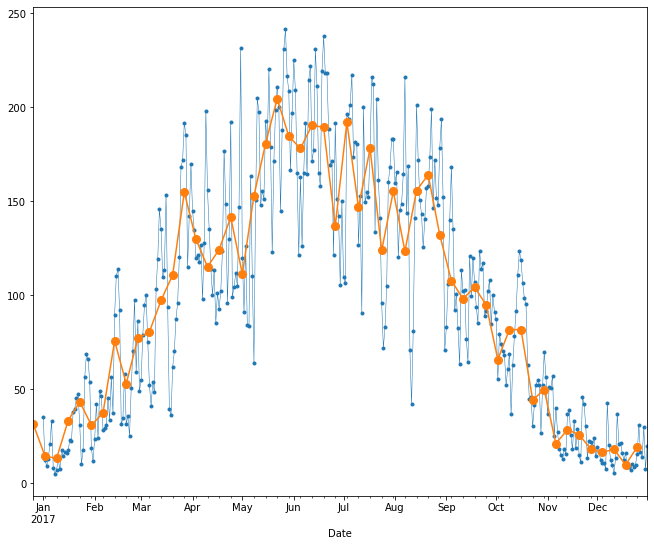

In [141]:
start, end = '2017-01', '2018-01'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))

Kita dapat melihat bahwa deret waktu rata-rata mingguan lebih halus daripada deret waktu harian karena variabilitas frekuensi yang lebih tinggi telah dirata-ratakan dalam resampling.

<AxesSubplot:xlabel='Date'>

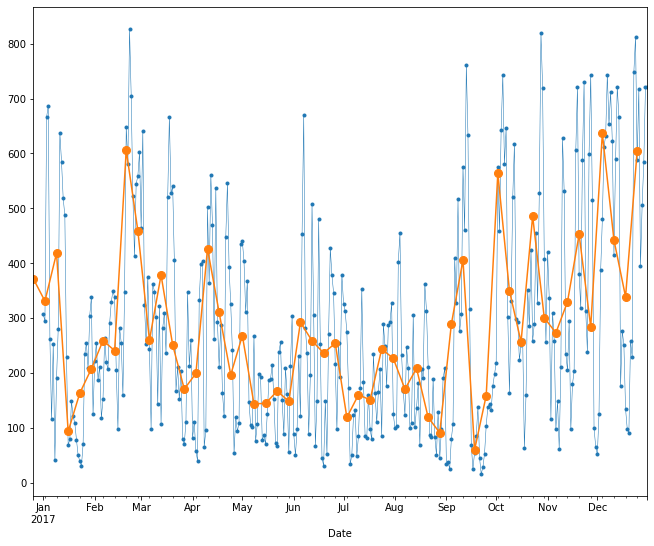

In [142]:
start, end = '2017-01', '2018-01'

opsd_daily.loc[start:end, 'Wind'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Wind'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))